In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import sklearn
from sklearn.metrics import mean_squared_error
from scipy.stats import variation
from datetime import datetime


In [18]:
df = pd.read_csv('Alcohol_Sales.csv')

In [19]:
df = df.set_index('date')
df.head()
df.describe()

,sales
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [21]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,sales
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
90%,11906.200000
95%,12865.400000
99%,14383.560000


c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


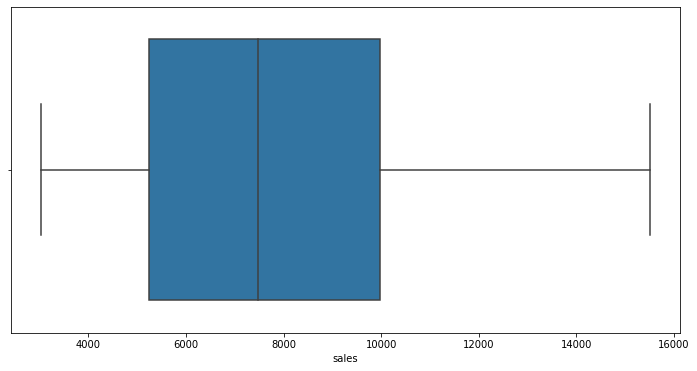

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(df['sales'])
plt.show()